In [45]:
domain_data = sc.textFile("/media/jw/5dccc50e-7c13-4186-bf6b-d894f02410be/result_jw_new/myline/domain_data_repeat/*")

In [48]:
nf = domain_data.flatMap(lambda line: line.split()).map(lambda word: (word, 1)).reduceByKey(lambda a, b: a+b).map(lambda p : p[1]).map(lambda word: (word, 1)).reduceByKey(lambda a, b: a+b)

In [53]:
nf.repartition(1).saveAsTextFile("/home/jw/project/spark/power_law/domain_data_repeat")

In [28]:
nf = sc.textFile("/home/jw/project/spark/power_law/domain_data_repeat").map(lambda t : eval(t))
x=nf.map(lambda p : p[0]).collect()
y=nf.map(lambda p : p[1]).collect()
plt.scatter(x,y)
plt.xscale('log')
plt.yscale('log')
plt.title("Frequency of Domain Occurrence in \n Keeping the Same Neighboring Domain")
plt.xlabel('domain visting count')
plt.ylabel('# of domain')
plt.savefig("3b-Frequency_domain_repeat.eps",format="eps")
plt.close()

In [54]:
domain_data = sc.textFile("/media/jw/5dccc50e-7c13-4186-bf6b-d894f02410be/result_jw_new/myline/domain_data/*")
nf = domain_data.flatMap(lambda line: line.split()).map(lambda word: (word, 1)).reduceByKey(lambda a, b: a+b).map(lambda p : p[1]).map(lambda word: (word, 1)).reduceByKey(lambda a, b: a+b)
nf.repartition(1).saveAsTextFile("/home/jw/project/spark/power_law/domain_data")

In [29]:
nf = sc.textFile("/home/jw/project/spark/power_law/domain_data").map(lambda t : eval(t))
x=nf.map(lambda p : p[0]).collect()
y=nf.map(lambda p : p[1]).collect()
plt.scatter(x,y)
plt.xscale('log')
plt.yscale('log')
plt.title("Frequency of Domain Occurrence in \n Removing the Same Neighboring")
plt.xlabel('domain visting count')
plt.ylabel('# of domain')
plt.savefig("3c-Frequency_domain_remove.eps",format="eps")
plt.close()

In [24]:
import matplotlib.pyplot as plt
domain_data = sc.textFile("/home/jw/gitproject/tensorflow/tensorflow/models/embedding/text8")
nf = domain_data.flatMap(lambda line: line.split()).map(lambda word: (word, 1)).reduceByKey(lambda a, b: a+b).map(lambda p : p[1]).map(lambda word: (word, 1)).reduceByKey(lambda a, b: a+b)
x=nf.map(lambda p : p[0]).collect()
y=nf.map(lambda p : p[1]).collect()
plt.scatter(x,y)
plt.xscale('log')
plt.yscale('log')
plt.title("Frequency of Word Occurrence in Wikipedia")
plt.xlabel('word mention count')
plt.ylabel('# of word')
plt.savefig("3a-Frequency_WordCount.eps",format="eps")
plt.close()

In [2]:
import gensim
import os 
model_path = "/media/jw/5dccc50e-7c13-4186-bf6b-d894f02410be/domain2vec_jw/20131228/ModelResult/model-size100"
fname = os.path.join(model_path, "model-all-word2vec")
fvocab = os.path.join(model_path, "model-all-vocabulary")
model = gensim.models.Word2Vec.load_word2vec_format(fname, fvocab=fvocab, binary=False)

/home/jw/anaconda3/lib/python3.5/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


/media/jw/5dccc50e-7c13-4186-bf6b-d894f02410be/domain2vec_jw/20131228/ModelResult/model-size100


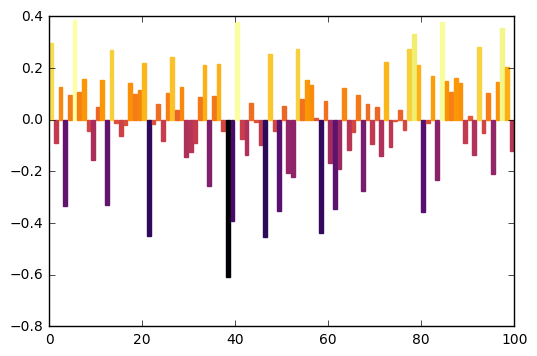

/media/jw/5dccc50e-7c13-4186-bf6b-d894f02410be/domain2vec_jw/20131229/ModelResult/model-size100


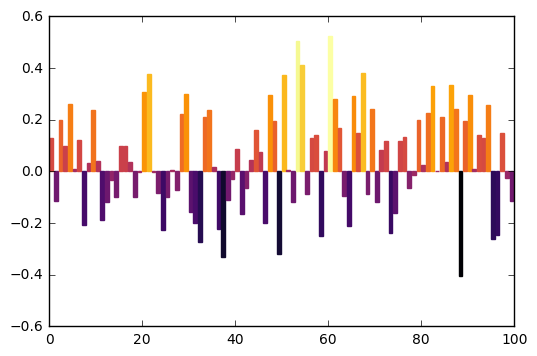

/media/jw/5dccc50e-7c13-4186-bf6b-d894f02410be/domain2vec_jw/20131230/ModelResult/model-size100


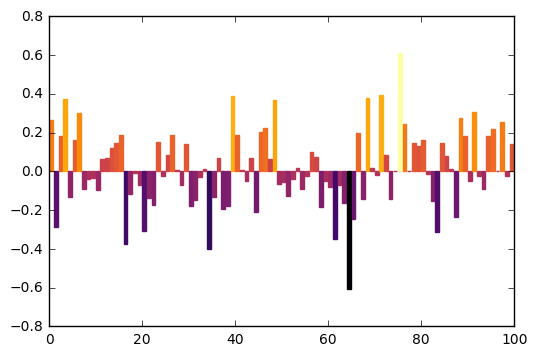

/media/jw/5dccc50e-7c13-4186-bf6b-d894f02410be/domain2vec_jw/20131231/ModelResult/model-size100


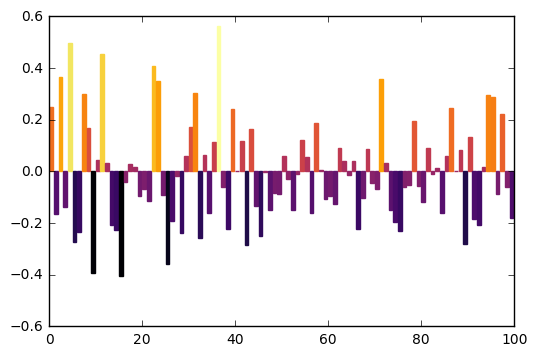

/media/jw/5dccc50e-7c13-4186-bf6b-d894f02410be/domain2vec_jw/20140101/ModelResult/model-size100


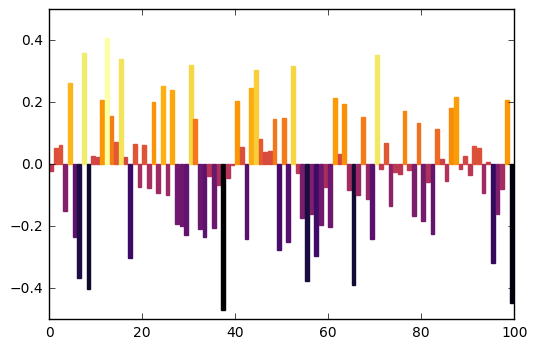

/media/jw/5dccc50e-7c13-4186-bf6b-d894f02410be/domain2vec_jw/20140102/ModelResult/model-size100


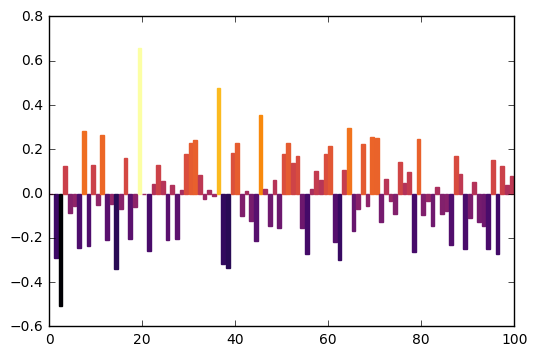

/media/jw/5dccc50e-7c13-4186-bf6b-d894f02410be/domain2vec_jw/20140103/ModelResult/model-size100


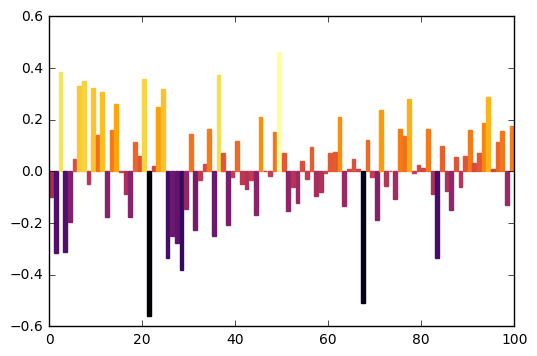

In [203]:

for date in [20131228,20131229,20131230,20131231,20140101,20140102,20140103]:
    model_path = "/media/jw/5dccc50e-7c13-4186-bf6b-d894f02410be/domain2vec_jw/%s/ModelResult/model-size100"%str(date)
    print(model_path)
    fname = os.path.join(model_path, "model-all-word2vec")
    fvocab = os.path.join(model_path, "model-all-vocabulary")
    model = gensim.models.Word2Vec.load_word2vec_format(fname, fvocab=fvocab, binary=False)
    Y = model['short.weixin.qq.com']
    X = list(range(1,101))
    max = abs(Y.min()) + abs(Y.max())
    for i in range(0,100):
        plt.bar(i, Y[i], color=cm.inferno(float(Y[i]+abs(Y.min()))/max),edgecolor = cm.inferno(float(Y[i]+abs(Y.min()))/max), alpha=1.00)
    # plt.xlim(0,100)
    filename = "fig5-"+str(date)+".eps"
    plt.savefig(filename, format="eps")
    plt.show()
    plt.close()

In [193]:
Y[99]

0.579777

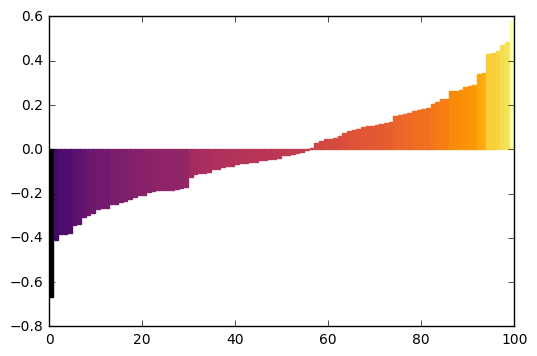

In [201]:
import matplotlib.cm as cm

Y = sorted(model['m.baidu.com'])
X = list(range(0,100))
max = abs(Y[0]) + abs(Y[99])
for i in range(0,100):
    plt.bar(i, Y[i], color=cm.inferno(float(Y[i]+abs(Y[0]))/max),edgecolor = cm.inferno(float(Y[i]+abs(Y[0]))/max), alpha=1.00)
# plt.xlim(0,100)
filename = "fig5-"+str(date)+".eps"
plt.savefig(filename, format="eps")
plt.show()

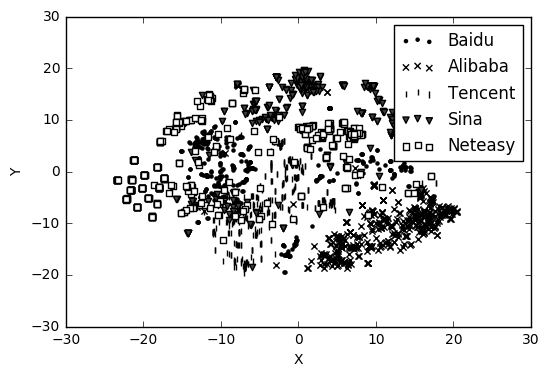

In [3]:
count = 400
baidu_embeddings = [model[word] for word in model.index2word  if "baidu" in word]
taobao_embeddings = [model[word] for word in model.index2word  if "taobao" in word]
qq_embeddings = [model[word] for word in model.index2word  if "qq" in word]

sina_embeddings = [model[word] for word in model.index2word  if "sina" in word]
wangyi_embeddings = [model[word] for word in model.index2word  if "163" in word]
# uc_embeddings = [model[word] for word in model.index2word  if "uc" in word]
final_embeddings = baidu_embeddings[:count]+taobao_embeddings[:count]+qq_embeddings[:count] + sina_embeddings[:count]+wangyi_embeddings[:count]
labels = ["."] * count + ["x"] * count + ["|"] * count + ["v"] * count + ["s"] * count
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
low_dim_embs = tsne.fit_transform(final_embeddings)

type1 = low_dim_embs[:count]
type2 = low_dim_embs[count:2*count]
type3 = low_dim_embs[2*count:3*count]
type4 = low_dim_embs[3*count:4*count]
type5 = low_dim_embs[4*count:5*count]

baidu = plt.scatter(type1.T[0],type1.T[1], c='0', marker=".")
taobao = plt.scatter(type2.T[0],type2.T[1], c='0', marker="x")
qq = plt.scatter(type3.T[0],type3.T[1], c='0', marker="|")
sina = plt.scatter(type4.T[0],type4.T[1], c='0.25', marker="v")
wangyi = plt.scatter(type5.T[0],type5.T[1], c='1', marker="s")
plt.legend((baidu,taobao,qq,sina,wangyi),("Baidu","Alibaba","Tencent","Sina","Neteasy"),loc='best')
# plt.title("The 2D presentation of dataset1's domain embedding that use Skip-gram model with keeping neighboring and t-SNE")
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig("company.eps", format="eps")
plt.show()
plt.close()

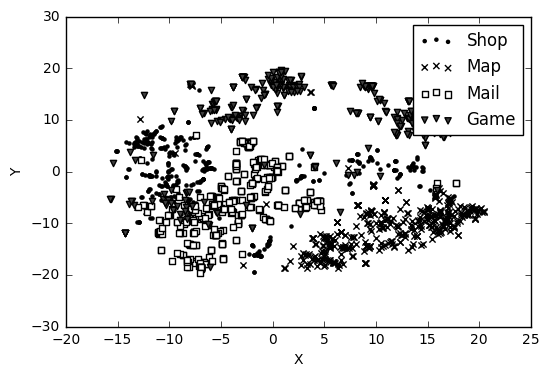

In [4]:
count = 400
shop_embeddings = [model[word] for word in model.index2word  if "shop" in word]
map_embeddings = [model[word] for word in model.index2word  if "map" in word]
mail_embeddings = [model[word] for word in model.index2word  if "mail" in word]
game_embeddings = [model[word] for word in model.index2word  if "game" in word]

final_embeddings = shop_embeddings[:count]+map_embeddings[:count]+mail_embeddings[:count] +game_embeddings[:count]
labels = ["."] * count + ["x"] * count + ["|"] * count + ["v"] * count + ["_"] * count
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
low_dim_embs = tsne.fit_transform(final_embeddings)

shop = plt.scatter(type1.T[0],type1.T[1], c='0', marker=".")
map = plt.scatter(type2.T[0],type2.T[1], c='0', marker="x")
mail = plt.scatter(type3.T[0],type3.T[1], c='1', marker="s")
game = plt.scatter(type4.T[0],type4.T[1], c='0.25', marker="v")
plt.legend((shop,map,mail,game),("Shop","Map","Mail","Game"),loc='best')
# plt.title("The 2D presentation of dataset2's domain embedding that use Skip-gram model with keeping neighboring and t-SNE")
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig("category.eps", format="eps")
plt.show()
plt.close()

In [12]:
#SVM 
size  = np.array([2,5,10,15,20,50,80,100,200,500,1000])
accuracy = np.array([0.53, 0.92, 0.96, 0.97, 0.96, 0.96, 0.94, 0.93, 0.93, 0.92, 0.93])

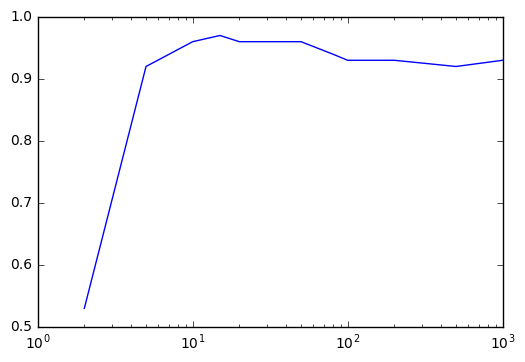

In [13]:
import matplotlib.pyplot as plt
plt.plot(size, accuracy)
plt.xscale('log')
plt.show()

In [15]:
error = 0.1 + 0.2 * accuracy
lower_error = 0.4 * error
upper_error = error

In [17]:
asymmetric_error = [lower_error, upper_error]
plt.errorbar(size, accuracy, yerr=error, fmt='-o')

<Container object of 3 artists>

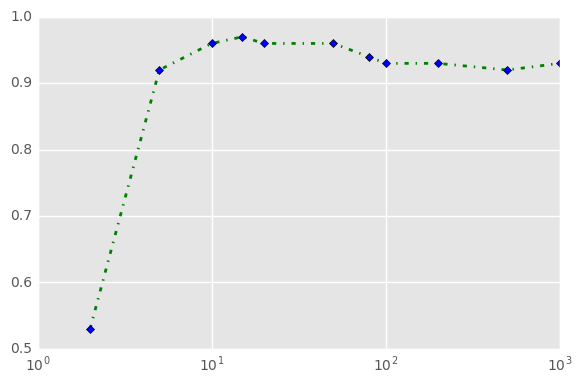

In [47]:
plt.style.use('ggplot')

plt.plot(size, accuracy,alpha = 1,linewidth=2, color='green', linestyle = '-.',markerfacecolor='blue',marker='D',markersize=4)
plt.xscale('log')
plt.show()

In [30]:
plt.plot?